<a href="https://colab.research.google.com/github/MSURENDRAN/AIML_Machine_Learning_Lab/blob/main/2348527_Lab04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import threading
import time
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, fpgrowth
from mlxtend.frequent_patterns import association_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dataset = pd.read_csv('/content/Groceries_dataset - Groceries_dataset.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dataset

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [ ]:
dataset.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(38765, 3)

In [ ]:
dataset.isnull().sum()

In [ ]:
def convert_to_transactions(dataset):
    # Convert dataset into a list of transactions
    #transactions = dataset.groupby('Transaction')['Item'].apply(list).values.tolist()
    dataset['q'] = 1
    transactions = dataset.groupby(['Member_number','itemDescription'])['q'].sum().unstack().applymap(lambda x: 1 if x >= 1 else 0).astype('bool')
    return transactions

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def run_apriori(transactions, min_support, min_confidence):
    frequent_itemsets = apriori(transactions, min_support=min_support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)

    return frequent_itemsets, rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def run_fpgrowth(transactions, min_support, min_confidence):
    frequent_itemsets = fpgrowth(transactions, min_support=min_support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)

    return frequent_itemsets, rules


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Multithreading
def run_algorithm(algorithm_func, transactions, min_support, min_confidence, results):
    start_time = time.time()
    frequent_itemsets, rules = algorithm_func(transactions, min_support, min_confidence)
    end_time = time.time()

    execution_time = end_time - start_time
    results.append(execution_time)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


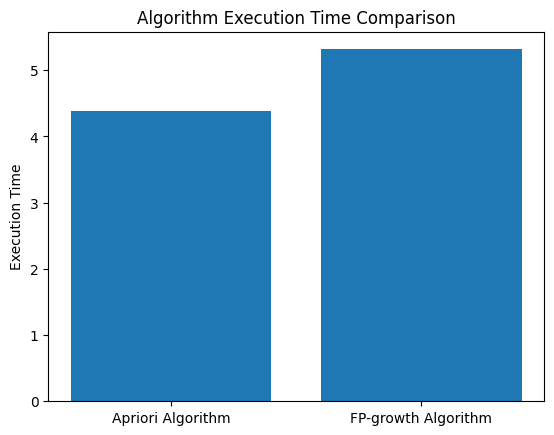

Apriori is the better algorithm for this dataset.


In [ ]:
# Algorithm Implementation
transactions = convert_to_transactions(dataset)

min_support = 0.01  # Set your desired min support
min_confidence = 0.2 # Set your desired min confidence

results = []

apriori_thread = threading.Thread(target=run_algorithm, args=(run_apriori, transactions, min_support, min_confidence, results))
fpgrowth_thread = threading.Thread(target=run_algorithm, args=(run_fpgrowth, transactions, min_support, min_confidence, results))
apriori_thread.start()
fpgrowth_thread.start()

apriori_thread.join()
fpgrowth_thread.join()

    # Data Visualization
algorithms = ['Apriori Algorithm', 'FP-growth Algorithm']
plt.bar(algorithms, results)
plt.ylabel('Execution Time')
plt.title('Algorithm Execution Time Comparison')
plt.show()

#Recommendation System
if results[0] > results[1]:
    print("FP-growth is the better algorithm for this dataset.")
else:
    print("Apriori is the better algorithm for this dataset.")
